In [29]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Modeling prior predictive distribution



In [22]:
allergies = CmdStanModel(stan_file='stan_files/model_1.stan')

INFO:cmdstanpy:compiling stan file /root/data_analytics/lab_3/stan_files/model_1.stan to exe file /root/data_analytics/lab_3/stan_files/model_1
INFO:cmdstanpy:compiled model executable: /root/data_analytics/lab_3/stan_files/model_1


In [ ]:
samples = allergies.sample(fixed_param=True, iter_sampling=1000, iter_warmup=0, chains = 1)

     lp__  accept_stat__     N     y         p
0     0.0            0.0  50.0   0.0  0.039975
1     0.0            0.0  50.0   1.0  0.045404
2     0.0            0.0  50.0  13.0  0.325394
3     0.0            0.0  50.0  17.0  0.296855
4     0.0            0.0  50.0   1.0  0.054696
..    ...            ...   ...   ...       ...
995   0.0            0.0  50.0  23.0  0.532759
996   0.0            0.0  50.0   9.0  0.120443
997   0.0            0.0  50.0   3.0  0.112695
998   0.0            0.0  50.0   9.0  0.192352
999   0.0            0.0  50.0   0.0  0.005851

[1000 rows x 5 columns]


<AxesSubplot:ylabel='Frequency'>

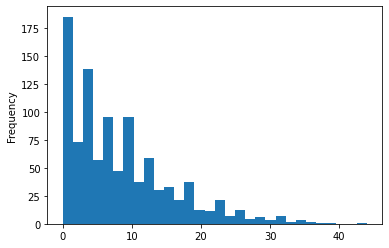

In [26]:
draws_pd = samples.draws_pd()
print(draws_pd)
draws_pd['y'].plot.hist(bins=30)


In [28]:
# Ratio mean
(draws_pd['y'] / 50).mean()

## It's slightly lower than the expected 20%

0.16760000000000003

### Modeling posterior and posterior predictive distribution

